In [484]:
import pandas as pd
import numpy as np

Leemos nuestro dataset y creamos el Dataframe "hospitalizaciones"

In [485]:
hospitalizaciones = pd.read_csv("datasets/hospitalizaciones_train.csv", decimal=".")

Para comenzar con nuestro EDA controlamos primero que no haya duplicados

In [486]:
hospitalizaciones.drop_duplicates(inplace=True)

Como podemos observar a continuación, no poseemos valores nulos en nuestros datos, pero sí que tenemos unas cuantas columnas no numéricas que debemos proceder a estandarizar

In [487]:
hospitalizaciones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

### `Descripción de las dimensiones`

**Available Extra Rooms in Hospital:** Habitaciones adicionales disponibles en el hospital. Una habitación no es igual a un paciente, pueden ser individuales o compartidas.  
**Department:** Área de atención a la que ingresa el paciente.  
**Ward_Facility_Code:** Código de la habitación del paciente.  
**doctor_name:** Nombre de el/la doctor/a a cargo del paciente.  
**staff_available:** Cantidad de personal disponible al momento del ingreso del paciente.  
**patientid:** Identificador del paciente.  
**Age:** Edad del paciente.  
**gender:** Género del paciente.  
**Type of Admission:** Tipo de ingreso registrado según la situación de ingreso del paciente.  
**Severity of Illness:** Gravedad de la enfermedad/condición/estado del paciente al momento del ingreso.  
**health_conditions:** Condiciones de salud del paciente.  
**Visitors with Patient:** Cantidad de visitantes registrados para el paciente.  
**Insurance:** Indica si la persona posee o no seguro de salud.  
**Admission_Deposit:** Pago realizado a nombre del paciente, con el fin de cubrir los costos iniciales de internación.  
**Stay (in days):** Días registrados de estancia hospitalaria.​  

Para empezar definimos que un paciente posee estancia hospitalaria prolongada si ha estado hospitalizado más de 8 días. Esta información se encuentra en la columna "Stay (in days)", por lo cual ya podemos crear nuestra columna target que se llamara 'pred' que tendrá 0 para estadías cortas y 1 para estadías largas.  
Ahora si eliminamos la columna "Stay (in days)" y también la columna "patientid" ya que no aporta nada a nuestro modelo y lo único que hace es complejizarlo.

In [488]:
hospitalizaciones['pred'] = hospitalizaciones['Stay (in days)'].apply(lambda x: 1 if x > 8 else 0)
hospitalizaciones.drop("Stay (in days)", inplace=True, axis=1)
hospitalizaciones.drop("patientid", inplace=True, axis=1)

Como podemos observar a continuación, nos encontramos con un dataset bastante balanceado por lo cual no debemos tomar ninguna acción para modificar esto

In [489]:
import seaborn as sns
import matplotlib.pyplot as plt

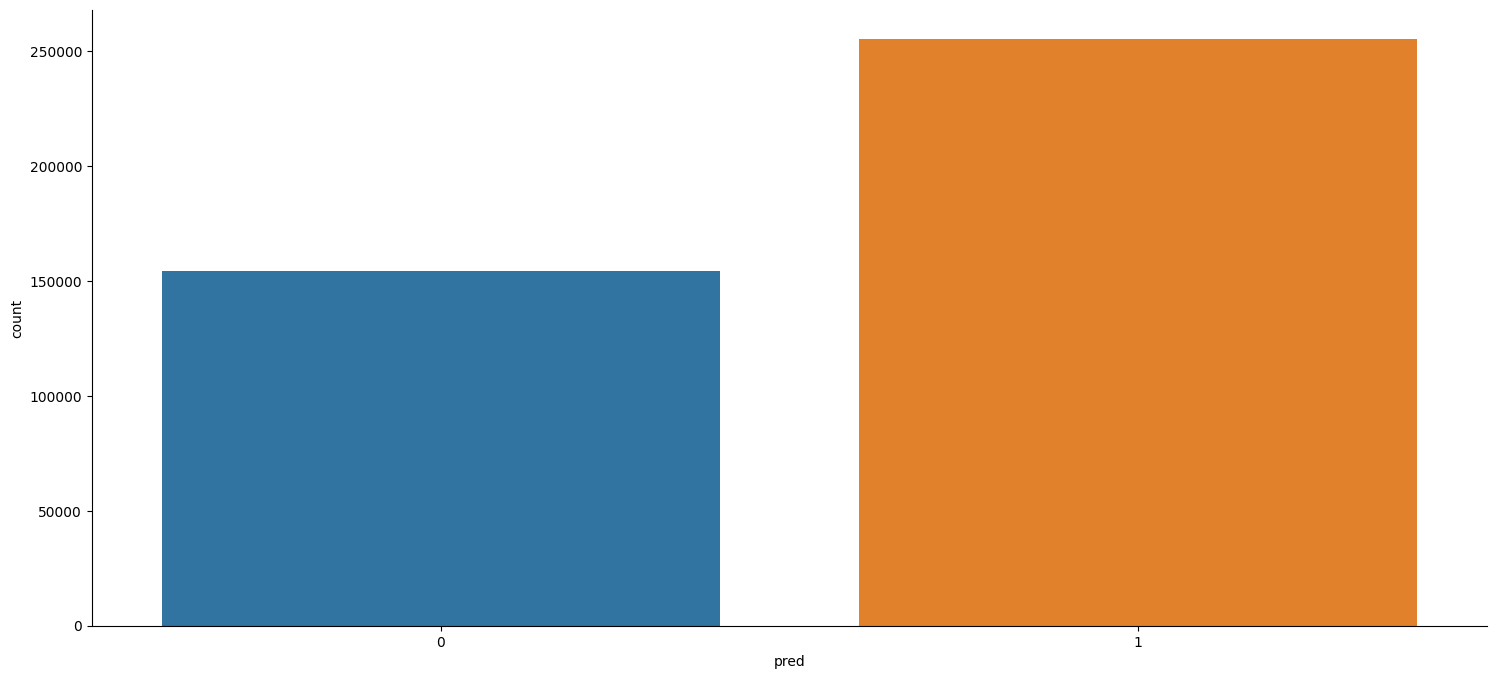

In [490]:
sns.countplot(x='pred', data=hospitalizaciones) 
plt.show()

### `Feature Encoding`

Aca empiezan las conversiones de Strings a valores numericos

In [491]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
le = LabelEncoder()
ohe = OneHotEncoder(dtype=int)
oe = OrdinalEncoder()

In [492]:
feature_arr = ohe.fit_transform(hospitalizaciones[['Department','Ward_Facility_Code', 'doctor_name', 'health_conditions']]).toarray()
feature_labels = ohe.categories_
feature_labels = np.concatenate(feature_labels)

In [493]:
features = pd.DataFrame(feature_arr, columns=feature_labels)
hospitalizaciones = pd.concat([hospitalizaciones, features], axis=1)
hospitalizaciones

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,...,Dr Sam,Dr Sarah,Dr Simon,Dr Sophia,Asthama,Diabetes,Heart disease,High Blood Pressure,None,Other
0,4,gynecology,D,Dr Sophia,0,41-50,Female,Trauma,Extreme,Diabetes,...,0,0,0,1,0,1,0,0,0,0
1,4,gynecology,B,Dr Sophia,2,31-40,Female,Trauma,Minor,Heart disease,...,0,0,0,1,0,0,1,0,0,0
2,2,gynecology,B,Dr Sophia,8,21-30,Female,Trauma,Extreme,Diabetes,...,0,0,0,1,0,1,0,0,0,0
3,4,gynecology,D,Dr Olivia,7,31-40,Female,Urgent,Moderate,None,...,0,0,0,0,0,0,0,0,1,0
4,2,anesthesia,E,Dr Mark,10,71-80,Male,Trauma,Moderate,Diabetes,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,D,Dr Sarah,1,31-40,Female,Trauma,Minor,Asthama,...,0,1,0,0,1,0,0,0,0,0
409996,5,gynecology,D,Dr Nathan,5,21-30,Female,Trauma,Extreme,Other,...,0,0,0,0,0,0,0,0,0,1
409997,4,gynecology,D,Dr Sarah,9,21-30,Female,Emergency,Minor,Asthama,...,0,1,0,0,1,0,0,0,0,0
409998,10,gynecology,D,Dr Olivia,10,21-30,Female,Trauma,Moderate,Other,...,0,0,0,0,0,0,0,0,0,1


In [494]:
oe = OrdinalEncoder(categories=[['0-10', '11-20', '21-30', '31-40', '41-50', '41-50', '51-60', '61-70', '71-80', '81-90' ,'91-100']], dtype=int)
hospitalizaciones["Age"] = oe.fit_transform(hospitalizaciones["Age"].values.reshape(-1,1))
hospitalizaciones

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,...,Dr Sam,Dr Sarah,Dr Simon,Dr Sophia,Asthama,Diabetes,Heart disease,High Blood Pressure,None,Other
0,4,gynecology,D,Dr Sophia,0,5,Female,Trauma,Extreme,Diabetes,...,0,0,0,1,0,1,0,0,0,0
1,4,gynecology,B,Dr Sophia,2,3,Female,Trauma,Minor,Heart disease,...,0,0,0,1,0,0,1,0,0,0
2,2,gynecology,B,Dr Sophia,8,2,Female,Trauma,Extreme,Diabetes,...,0,0,0,1,0,1,0,0,0,0
3,4,gynecology,D,Dr Olivia,7,3,Female,Urgent,Moderate,None,...,0,0,0,0,0,0,0,0,1,0
4,2,anesthesia,E,Dr Mark,10,8,Male,Trauma,Moderate,Diabetes,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,D,Dr Sarah,1,3,Female,Trauma,Minor,Asthama,...,0,1,0,0,1,0,0,0,0,0
409996,5,gynecology,D,Dr Nathan,5,2,Female,Trauma,Extreme,Other,...,0,0,0,0,0,0,0,0,0,1
409997,4,gynecology,D,Dr Sarah,9,2,Female,Emergency,Minor,Asthama,...,0,1,0,0,1,0,0,0,0,0
409998,10,gynecology,D,Dr Olivia,10,2,Female,Trauma,Moderate,Other,...,0,0,0,0,0,0,0,0,0,1


In [495]:
oe = OrdinalEncoder(dtype=int)
hospitalizaciones["gender"] = oe.fit_transform(hospitalizaciones["gender"].values.reshape(-1,1))
hospitalizaciones

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,...,Dr Sam,Dr Sarah,Dr Simon,Dr Sophia,Asthama,Diabetes,Heart disease,High Blood Pressure,None,Other
0,4,gynecology,D,Dr Sophia,0,5,0,Trauma,Extreme,Diabetes,...,0,0,0,1,0,1,0,0,0,0
1,4,gynecology,B,Dr Sophia,2,3,0,Trauma,Minor,Heart disease,...,0,0,0,1,0,0,1,0,0,0
2,2,gynecology,B,Dr Sophia,8,2,0,Trauma,Extreme,Diabetes,...,0,0,0,1,0,1,0,0,0,0
3,4,gynecology,D,Dr Olivia,7,3,0,Urgent,Moderate,None,...,0,0,0,0,0,0,0,0,1,0
4,2,anesthesia,E,Dr Mark,10,8,1,Trauma,Moderate,Diabetes,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,D,Dr Sarah,1,3,0,Trauma,Minor,Asthama,...,0,1,0,0,1,0,0,0,0,0
409996,5,gynecology,D,Dr Nathan,5,2,0,Trauma,Extreme,Other,...,0,0,0,0,0,0,0,0,0,1
409997,4,gynecology,D,Dr Sarah,9,2,0,Emergency,Minor,Asthama,...,0,1,0,0,1,0,0,0,0,0
409998,10,gynecology,D,Dr Olivia,10,2,0,Trauma,Moderate,Other,...,0,0,0,0,0,0,0,0,0,1


In [496]:
oe = OrdinalEncoder(categories=[['Emergency', 'Trauma', 'Urgent']], dtype=int)
hospitalizaciones["Type of Admission"] = oe.fit_transform(hospitalizaciones["Type of Admission"].values.reshape(-1,1))
hospitalizaciones

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,...,Dr Sam,Dr Sarah,Dr Simon,Dr Sophia,Asthama,Diabetes,Heart disease,High Blood Pressure,None,Other
0,4,gynecology,D,Dr Sophia,0,5,0,1,Extreme,Diabetes,...,0,0,0,1,0,1,0,0,0,0
1,4,gynecology,B,Dr Sophia,2,3,0,1,Minor,Heart disease,...,0,0,0,1,0,0,1,0,0,0
2,2,gynecology,B,Dr Sophia,8,2,0,1,Extreme,Diabetes,...,0,0,0,1,0,1,0,0,0,0
3,4,gynecology,D,Dr Olivia,7,3,0,2,Moderate,None,...,0,0,0,0,0,0,0,0,1,0
4,2,anesthesia,E,Dr Mark,10,8,1,1,Moderate,Diabetes,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,D,Dr Sarah,1,3,0,1,Minor,Asthama,...,0,1,0,0,1,0,0,0,0,0
409996,5,gynecology,D,Dr Nathan,5,2,0,1,Extreme,Other,...,0,0,0,0,0,0,0,0,0,1
409997,4,gynecology,D,Dr Sarah,9,2,0,0,Minor,Asthama,...,0,1,0,0,1,0,0,0,0,0
409998,10,gynecology,D,Dr Olivia,10,2,0,1,Moderate,Other,...,0,0,0,0,0,0,0,0,0,1


In [497]:
oe = OrdinalEncoder(categories=[['Extreme', 'Moderate', 'Minor']], dtype=int)
hospitalizaciones["Severity of Illness"] = oe.fit_transform(hospitalizaciones["Severity of Illness"].values.reshape(-1,1))
hospitalizaciones

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,...,Dr Sam,Dr Sarah,Dr Simon,Dr Sophia,Asthama,Diabetes,Heart disease,High Blood Pressure,None,Other
0,4,gynecology,D,Dr Sophia,0,5,0,1,0,Diabetes,...,0,0,0,1,0,1,0,0,0,0
1,4,gynecology,B,Dr Sophia,2,3,0,1,2,Heart disease,...,0,0,0,1,0,0,1,0,0,0
2,2,gynecology,B,Dr Sophia,8,2,0,1,0,Diabetes,...,0,0,0,1,0,1,0,0,0,0
3,4,gynecology,D,Dr Olivia,7,3,0,2,1,None,...,0,0,0,0,0,0,0,0,1,0
4,2,anesthesia,E,Dr Mark,10,8,1,1,1,Diabetes,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,D,Dr Sarah,1,3,0,1,2,Asthama,...,0,1,0,0,1,0,0,0,0,0
409996,5,gynecology,D,Dr Nathan,5,2,0,1,0,Other,...,0,0,0,0,0,0,0,0,0,1
409997,4,gynecology,D,Dr Sarah,9,2,0,0,2,Asthama,...,0,1,0,0,1,0,0,0,0,0
409998,10,gynecology,D,Dr Olivia,10,2,0,1,1,Other,...,0,0,0,0,0,0,0,0,0,1


In [498]:
oe = OrdinalEncoder(dtype=int)
hospitalizaciones["Insurance"] = oe.fit_transform(hospitalizaciones["Insurance"].values.reshape(-1,1))
hospitalizaciones

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,...,Dr Sam,Dr Sarah,Dr Simon,Dr Sophia,Asthama,Diabetes,Heart disease,High Blood Pressure,None,Other
0,4,gynecology,D,Dr Sophia,0,5,0,1,0,Diabetes,...,0,0,0,1,0,1,0,0,0,0
1,4,gynecology,B,Dr Sophia,2,3,0,1,2,Heart disease,...,0,0,0,1,0,0,1,0,0,0
2,2,gynecology,B,Dr Sophia,8,2,0,1,0,Diabetes,...,0,0,0,1,0,1,0,0,0,0
3,4,gynecology,D,Dr Olivia,7,3,0,2,1,None,...,0,0,0,0,0,0,0,0,1,0
4,2,anesthesia,E,Dr Mark,10,8,1,1,1,Diabetes,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,D,Dr Sarah,1,3,0,1,2,Asthama,...,0,1,0,0,1,0,0,0,0,0
409996,5,gynecology,D,Dr Nathan,5,2,0,1,0,Other,...,0,0,0,0,0,0,0,0,0,1
409997,4,gynecology,D,Dr Sarah,9,2,0,0,2,Asthama,...,0,1,0,0,1,0,0,0,0,0
409998,10,gynecology,D,Dr Olivia,10,2,0,1,1,Other,...,0,0,0,0,0,0,0,0,0,1


In [499]:
hospitalizaciones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410000 entries, 0 to 409999
Data columns (total 40 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   Age                                410000 non-null  int32  
 6   gender                             410000 non-null  int32  
 7   Type of Admission                  410000 non-null  int32  
 8   Severity of Illness                410000 non-null  int32  
 9   health_conditions                  410000 non-null  object 
 10  Visitors with Patient              410000 non-null  int64  
 11  Insurance                          4100

In [500]:
hospitalizaciones.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,...,Dr Sam,Dr Sarah,Dr Simon,Dr Sophia,Asthama,Diabetes,Heart disease,High Blood Pressure,None,Other
0,4,gynecology,D,Dr Sophia,0,5,0,1,0,Diabetes,...,0,0,0,1,0,1,0,0,0,0
1,4,gynecology,B,Dr Sophia,2,3,0,1,2,Heart disease,...,0,0,0,1,0,0,1,0,0,0
2,2,gynecology,B,Dr Sophia,8,2,0,1,0,Diabetes,...,0,0,0,1,0,1,0,0,0,0
3,4,gynecology,D,Dr Olivia,7,3,0,2,1,None,...,0,0,0,0,0,0,0,0,1,0
4,2,anesthesia,E,Dr Mark,10,8,1,1,1,Diabetes,...,0,0,0,0,0,1,0,0,0,0


En vez de borrar los atributos los cambio a numericos tambien

In [501]:
hospitalizaciones.drop("Department", inplace=True, axis=1)
hospitalizaciones.drop("Ward_Facility_Code", inplace=True, axis=1)
hospitalizaciones.drop("doctor_name", inplace=True, axis=1)
hospitalizaciones.drop("health_conditions", inplace=True, axis=1)

In [75]:
oe = OrdinalEncoder(dtype=int)
hospitalizaciones["Department"] = oe.fit_transform(hospitalizaciones["Department"].values.reshape(-1,1))
hospitalizaciones["Ward_Facility_Code"] = oe.fit_transform(hospitalizaciones["Ward_Facility_Code"].values.reshape(-1,1))
hospitalizaciones["doctor_name"] = oe.fit_transform(hospitalizaciones["doctor_name"].values.reshape(-1,1))
hospitalizaciones["health_conditions"] = oe.fit_transform(hospitalizaciones["health_conditions"].values.reshape(-1,1))

### `Escalado de valores`

In [360]:
hospitalizaciones.describe()

,Available Extra Rooms in Hospital,staff_available,Age,gender,Type of Admission,Severity of Illness,Visitors with Patient,Insurance,Admission_Deposit,pred,...,Dr Sam,Dr Sarah,Dr Simon,Dr Sophia,Asthama,Diabetes,Heart disease,High Blood Pressure,None,Other
count,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000,...,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000
mean,3.639376,5.020946,3.440020,0.313149,0.835498,1.089300,3.552520,0.830485,4723.419239,0.622966,...,0.121546,0.191993,0.002895,0.133793,0.122995,0.143144,0.051846,0.156315,0.334639,0.191061
std,2.701702,3.158018,2.024348,0.549882,0.593064,0.655022,2.247459,0.375206,1047.420292,0.484644,...,0.326762,0.393868,0.053728,0.340430,0.328432,0.350220,0.221717,0.363154,0.471865,0.393137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1654.005148,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,0.000000,0.000000,1.000000,2.000000,1.000000,4072.638351,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,5.000000,3.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4627.488745,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,8.000000,5.000000,1.000000,1.000000,2.000000,4.000000,1.000000,5092.349430,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,24.000000,10.000000,10.000000,2.000000,2.000000,2.000000,32.000000,1.000000,10104.726390,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Para simplificar el conjunto de datos y mejorar el rendimiento del modelo vamos a aplicar StandarScaler a la columna "Admission_Deposit" ya que como podemos obserar en el describe() esta columna posea una escala de valores muy diferente a la del resto

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler() 
scaler.fit(hospitalizaciones[['Admission_Deposit']]) 
hospitalizaciones['Admission_Deposit'] = scaler.transform(hospitalizaciones[['Admission_Deposit']]) 

### `Pairplot`

En esta instancia, emplearemos un paso fundamental dentro de todo **EDA** que nos muestra todas las relaciones entre las variables cuantitativas del dataframe que estemos trabajando. La importancia de este paso radica en que nos permite elegir las mejores variables predictoras para nuestro modelo. Si queremos predecir la variedad de una flor, lo más racional sería seleccionar aquellos atributos que tengan una mayor incidencia en que una flor pertenezca a una u otra categoría.

Como se desprende de lo comentado, este paso es condición _sine qua non_ en cualquier **Análisis Exploratorio de Datos** que emprendan.

In [361]:
columnas = list(hospitalizaciones.columns)
columnas

['Available Extra Rooms in Hospital',
 'staff_available',
 'Age',
 'gender',
 'Type of Admission',
 'Severity of Illness',
 'Visitors with Patient',
 'Insurance',
 'Admission_Deposit',
 'pred',
 'TB & Chest disease',
 'anesthesia',
 'gynecology',
 'radiotherapy',
 'surgery',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'Dr Isaac',
 'Dr John',
 'Dr Mark',
 'Dr Nathan',
 'Dr Olivia',
 'Dr Sam',
 'Dr Sarah',
 'Dr Simon',
 'Dr Sophia',
 'Asthama',
 'Diabetes',
 'Heart disease',
 'High Blood Pressure',
 'None',
 'Other']

Creo diferentes agrupaciones de variables para ir viendo sus relaciones con "pred" por separado

In [369]:
# Condiciones del hospital
columnas[0] = ['Available Extra Rooms in Hospital', 'staff_available', 'pred']

# Condiciones del paciente
columnas[1] = ['Age', 'gender', 'Type of Admission', 'Severity of Illness', 'Visitors with Patient', 'Insurance', 'Admission_Deposit', 'pred']

# Departamentos
columnas[2] = ['TB & Chest disease', 'anesthesia', 'gynecology', 'radiotherapy', 'surgery', 'pred']

# Habitacion del paciente
columnas[3] = ['A', 'B', 'C', 'D', 'E', 'F', 'pred']

# Nombre del Doctor
columnas[4] = ['Dr Isaac', 'Dr John', 'Dr Mark', 'Dr Nathan', 'Dr Olivia', 'Dr Sam', 'Dr Sarah', 'Dr Simon', 'Dr Sophia', 'Asthama', 'pred']

# Condicion de salud del paciente
columnas[5] = ['Diabetes', 'Heart disease', 'High Blood Pressure', 'None', 'Other', 'pred']


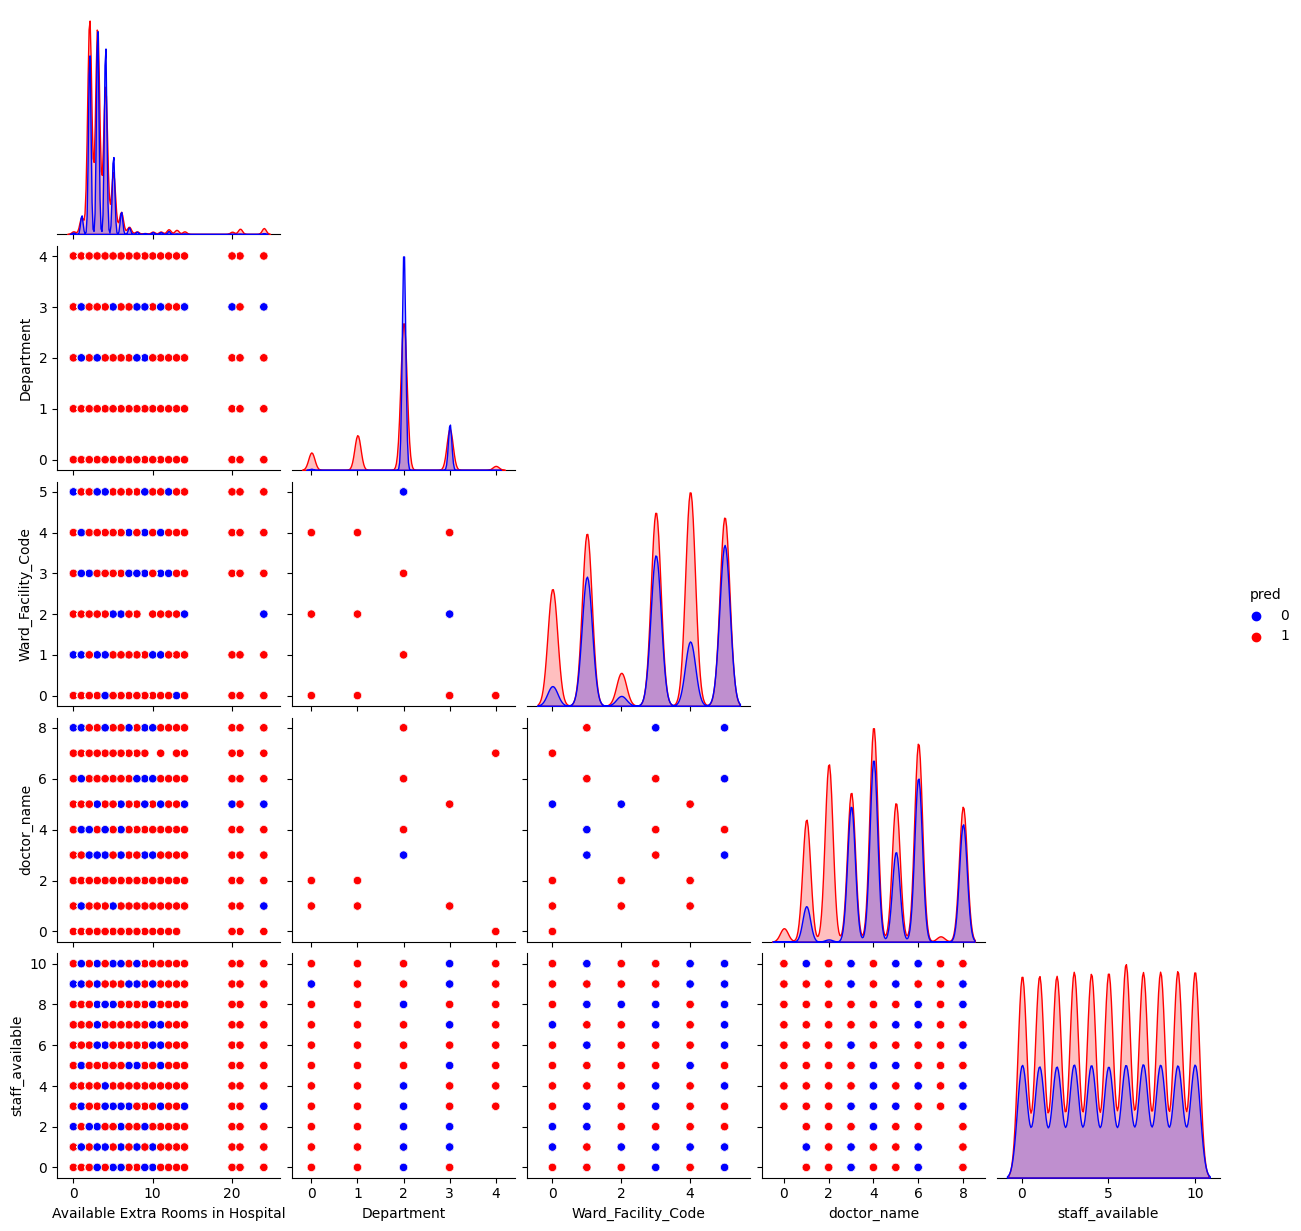

In [87]:
# 2' 24''
sns.pairplot(hospitalizaciones[columnas[0]], hue="pred", palette = ['b', 'r'], corner=True)
plt.show()

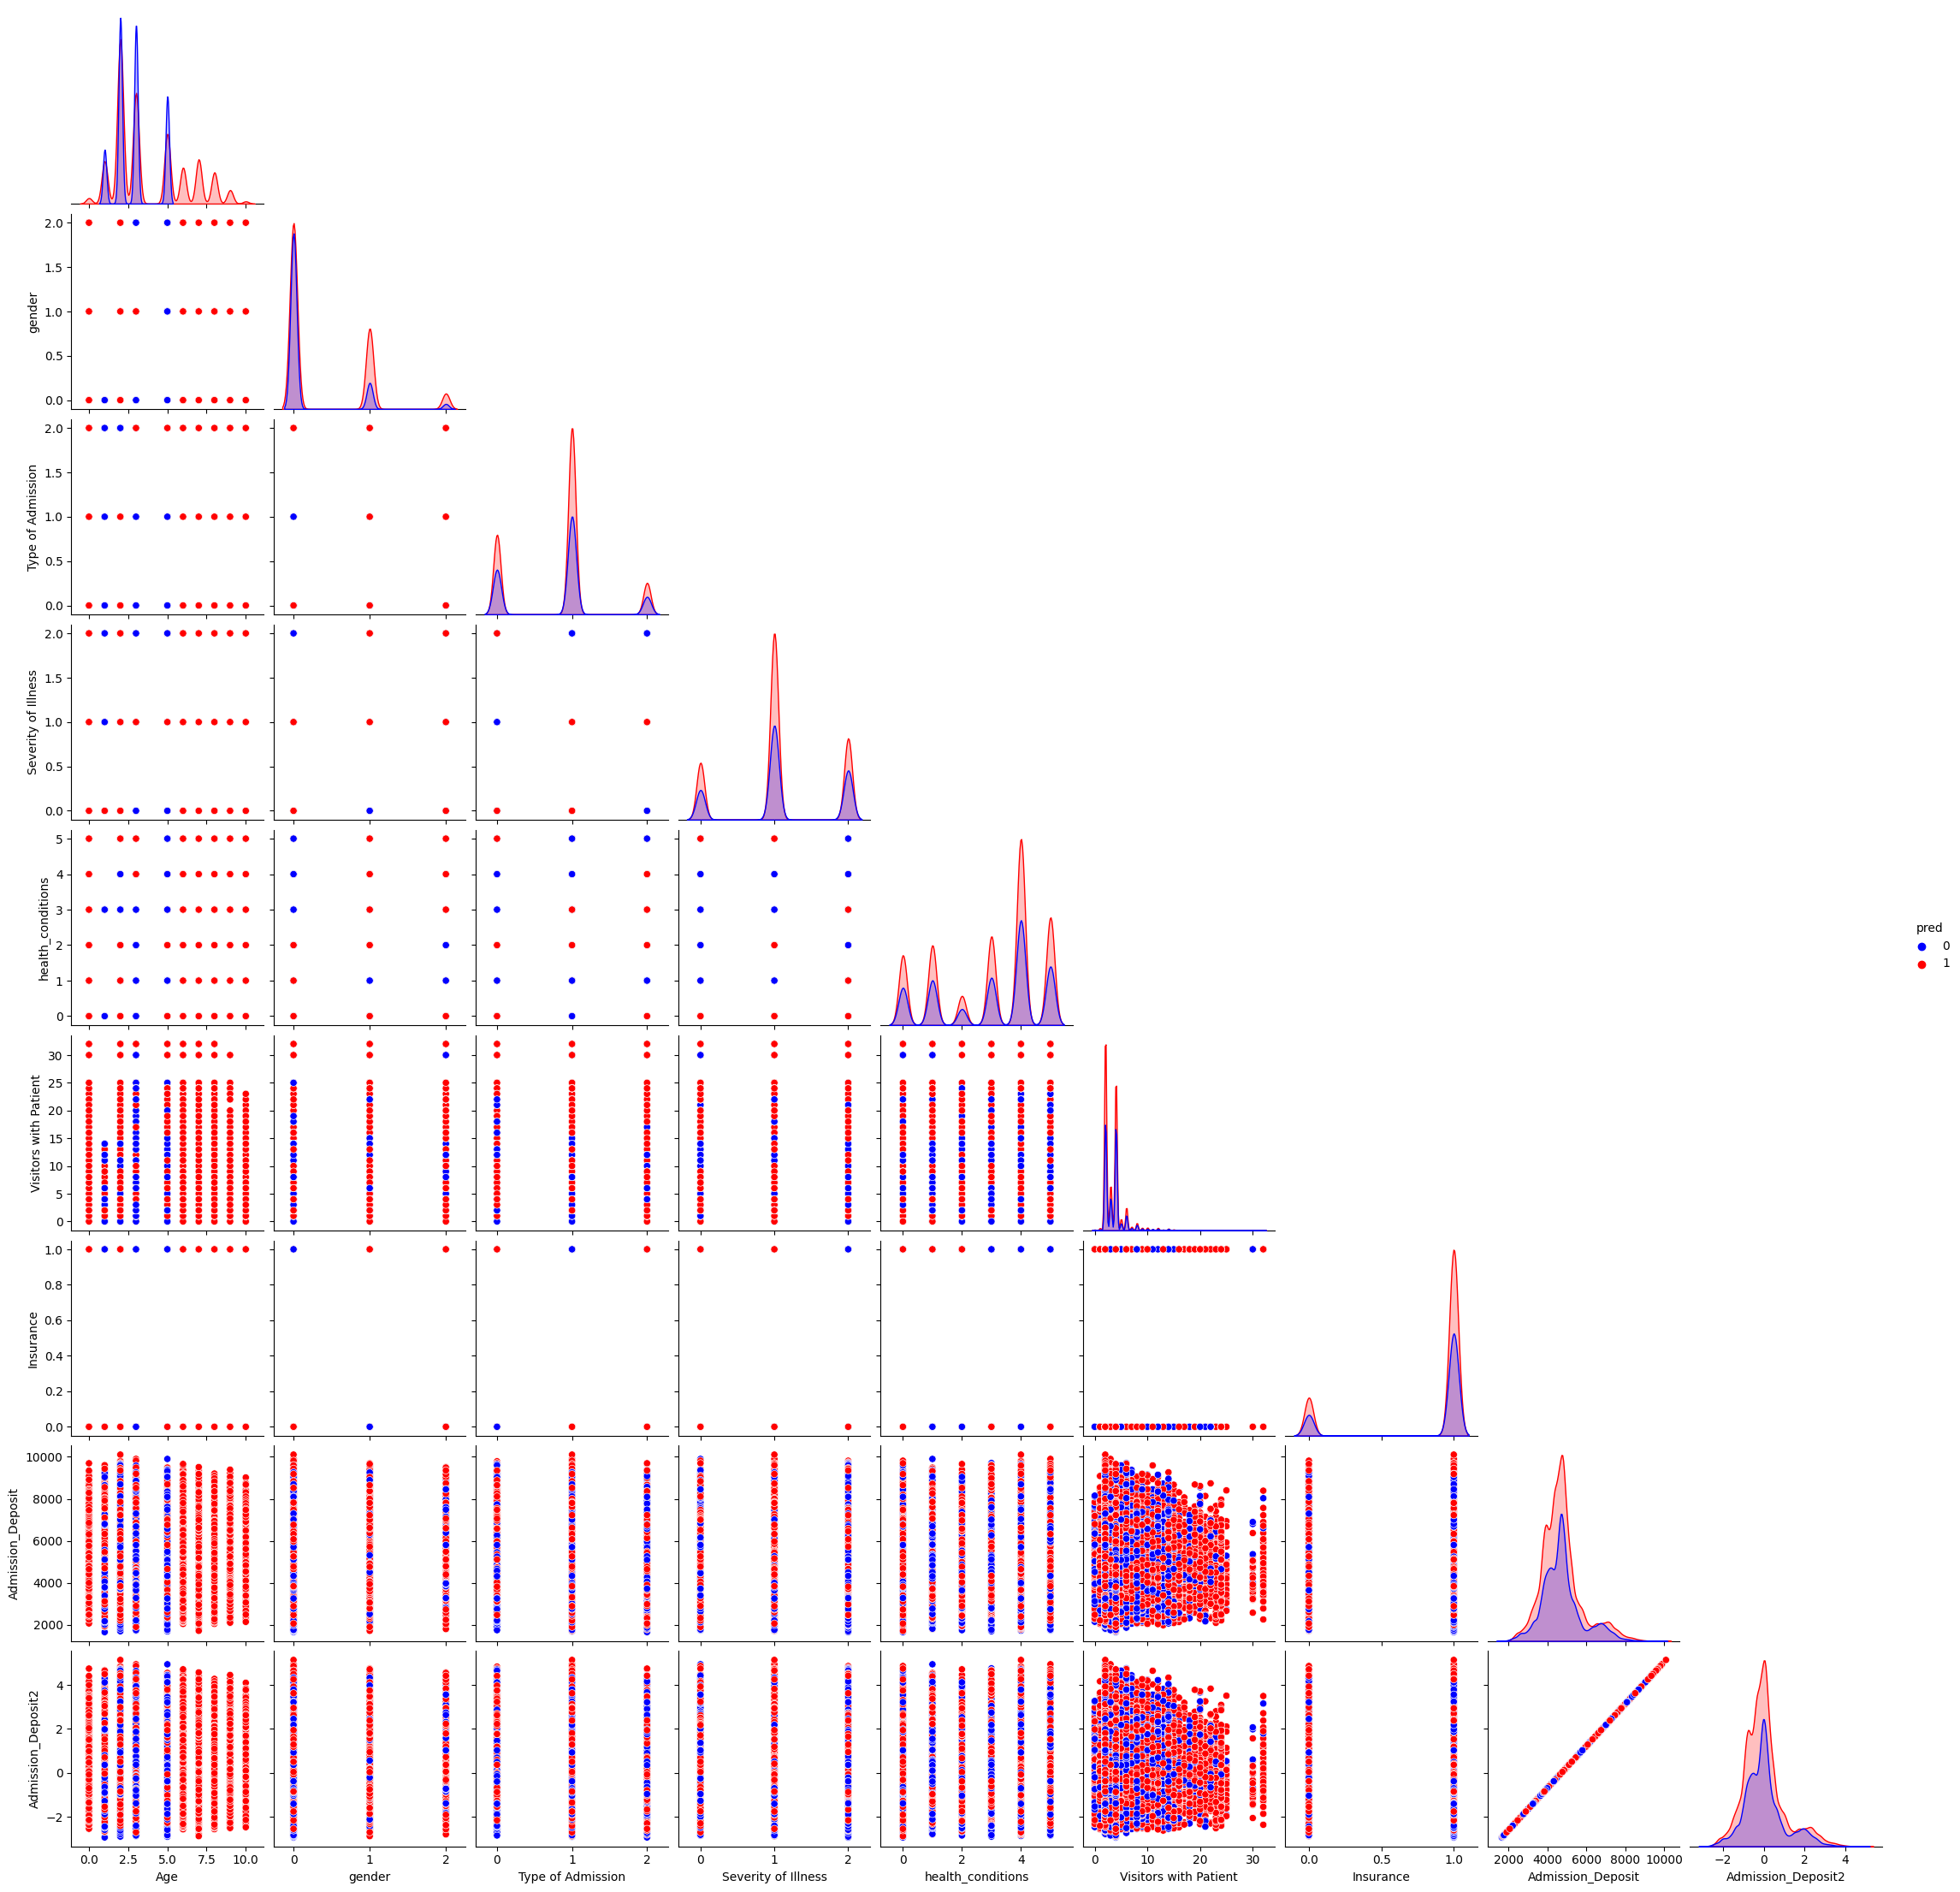

In [97]:
# 8' 10'' 
sns.pairplot(hospitalizaciones[columnas[1]], hue="pred", palette = ['b', 'r'], corner=True)
plt.show()

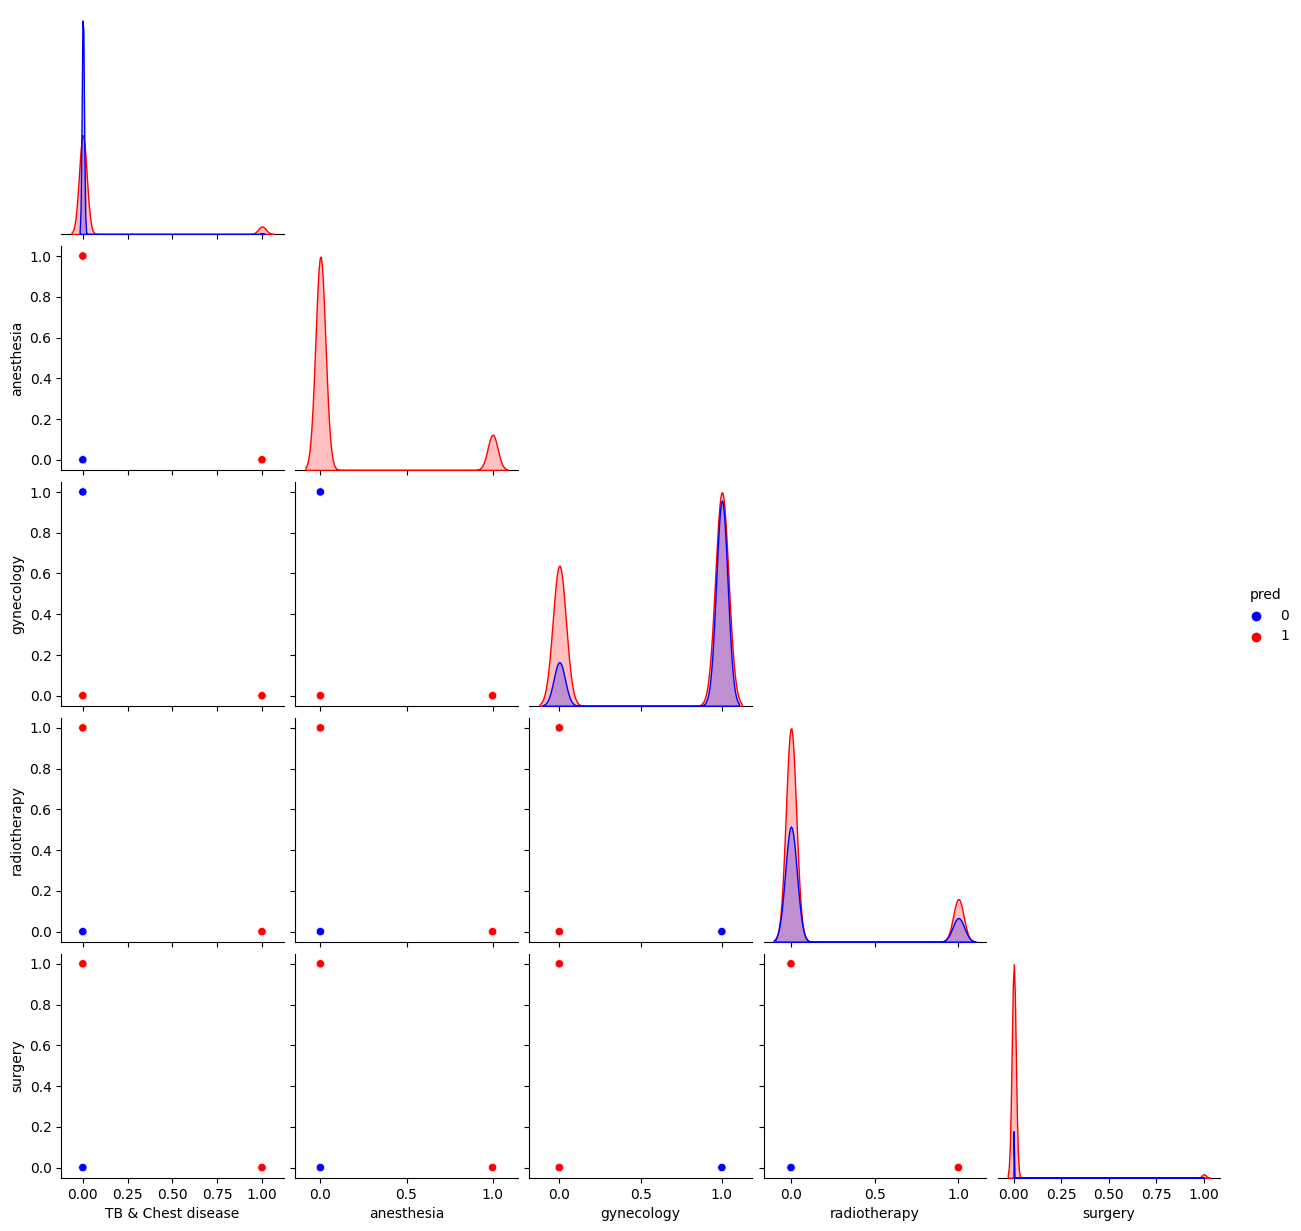

In [90]:
# 2' 18''
sns.pairplot(hospitalizaciones[columnas[2]], hue="pred", palette = ['b', 'r'], corner=True)
plt.show()

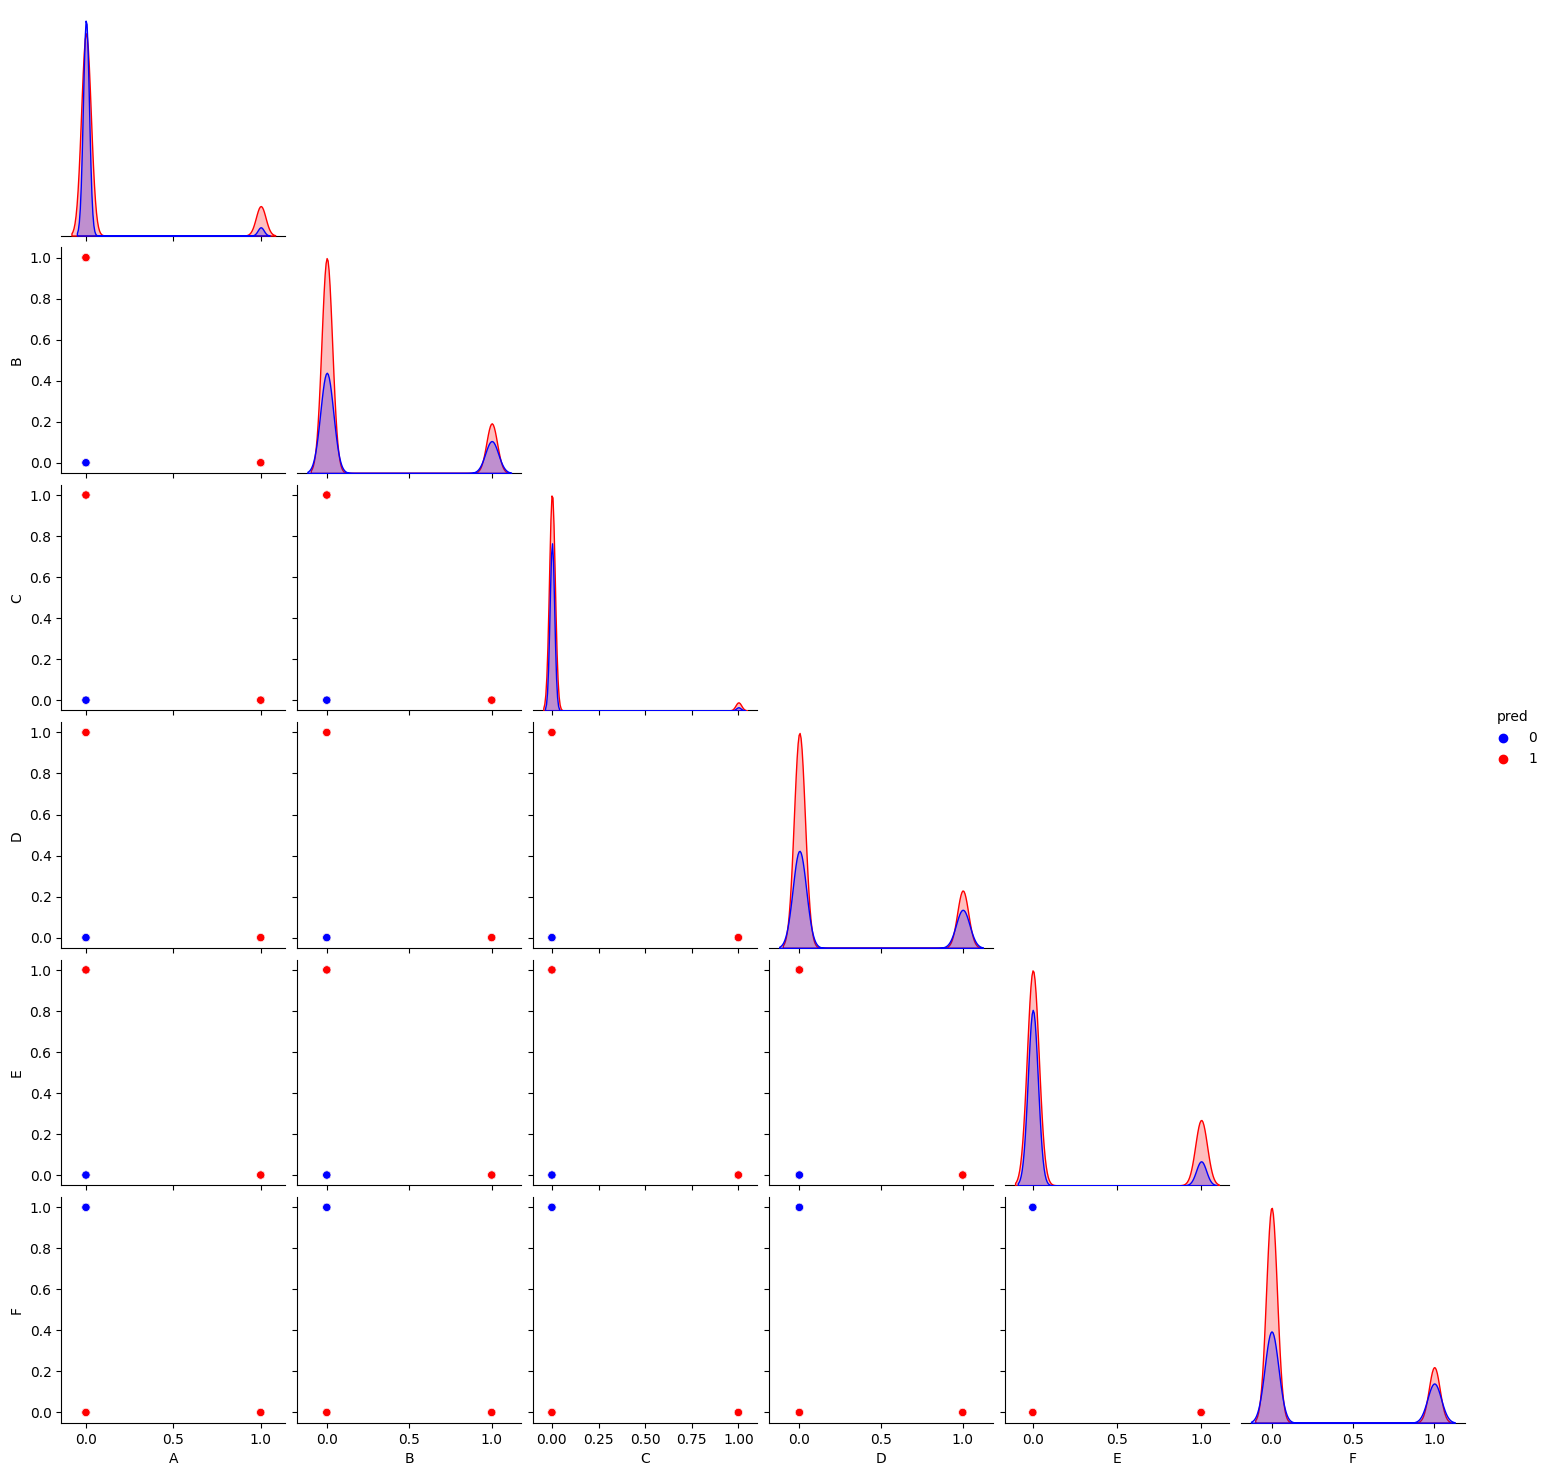

In [91]:
# 3' 28''
sns.pairplot(hospitalizaciones[columnas[3]], hue="pred", palette = ['b', 'r'], corner=True)
plt.show()

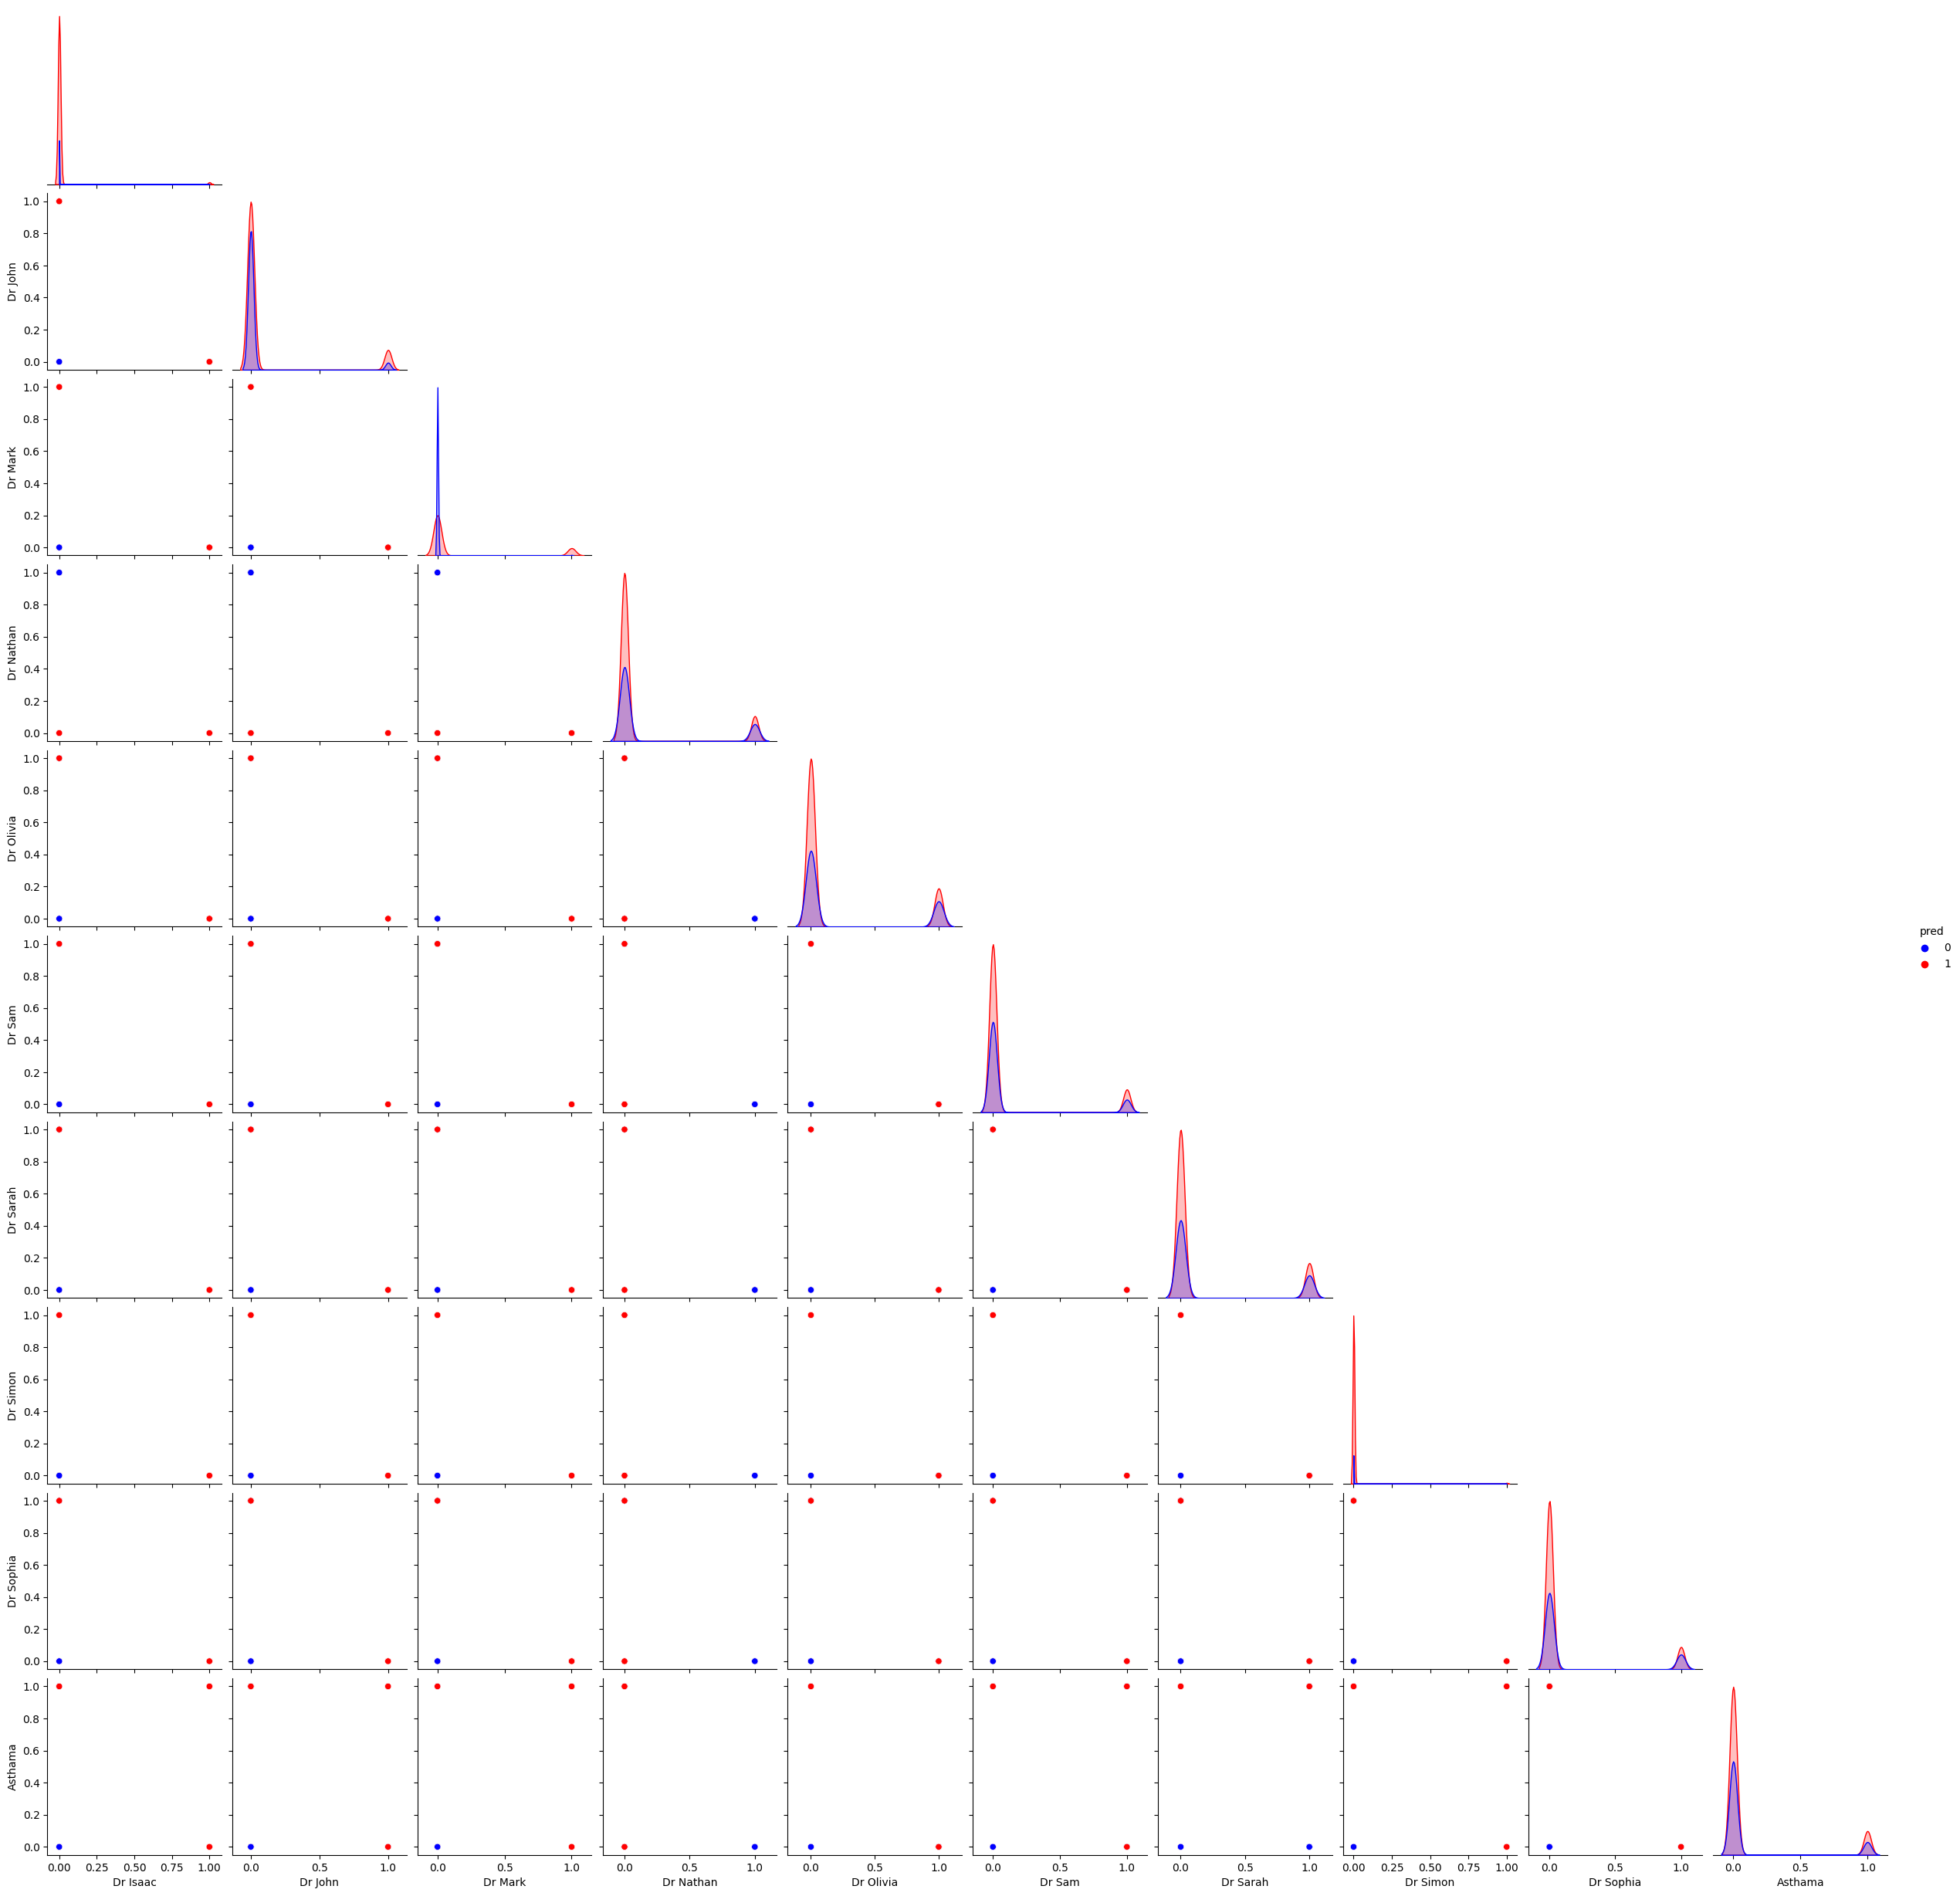

In [92]:
# 10'
sns.pairplot(hospitalizaciones[columnas[4]], hue="pred", palette = ['b', 'r'], corner=True)
plt.show()

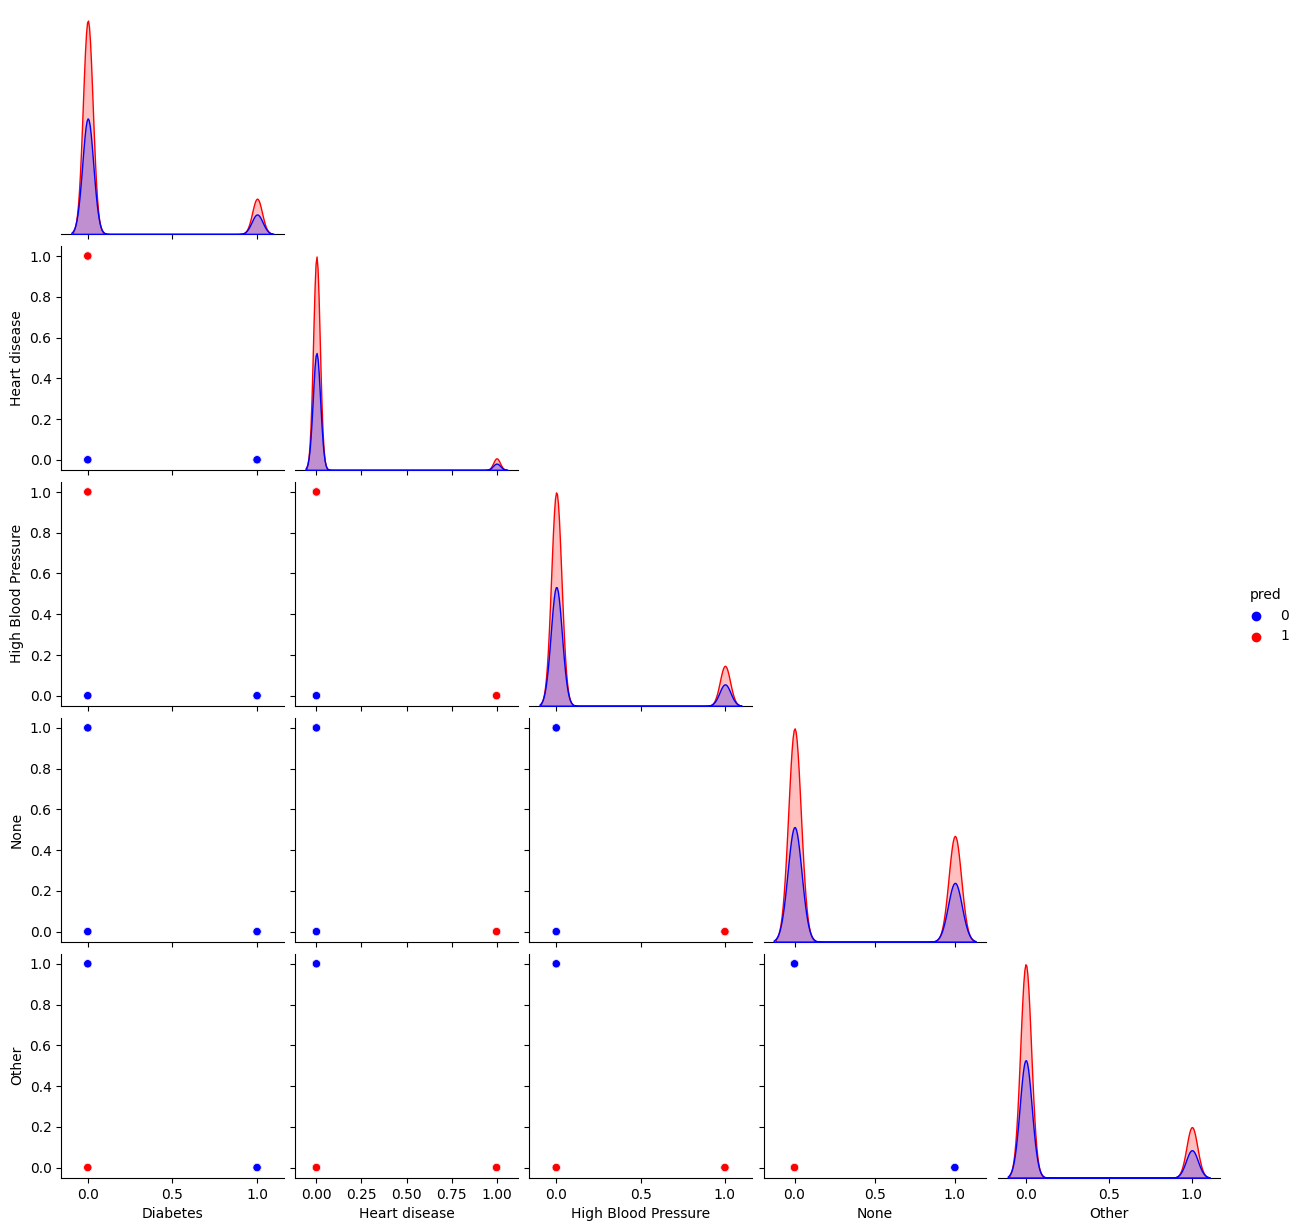

In [93]:
# 2' 22''
sns.pairplot(hospitalizaciones[columnas[5]], hue="pred", palette = ['b', 'r'], corner=True)
plt.show()

In [366]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show();

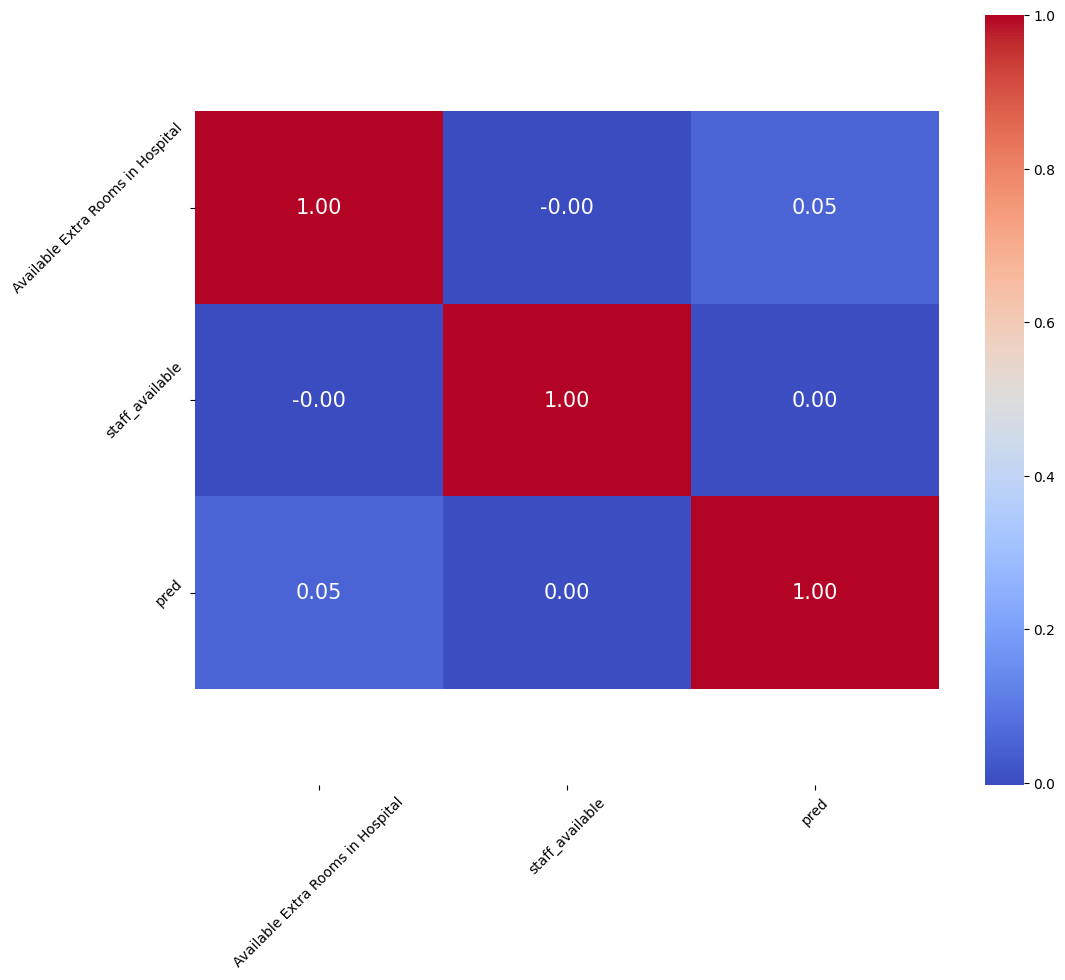

In [370]:
corr = hospitalizaciones[columnas[0]].corr()
plot_corre_heatmap(corr)

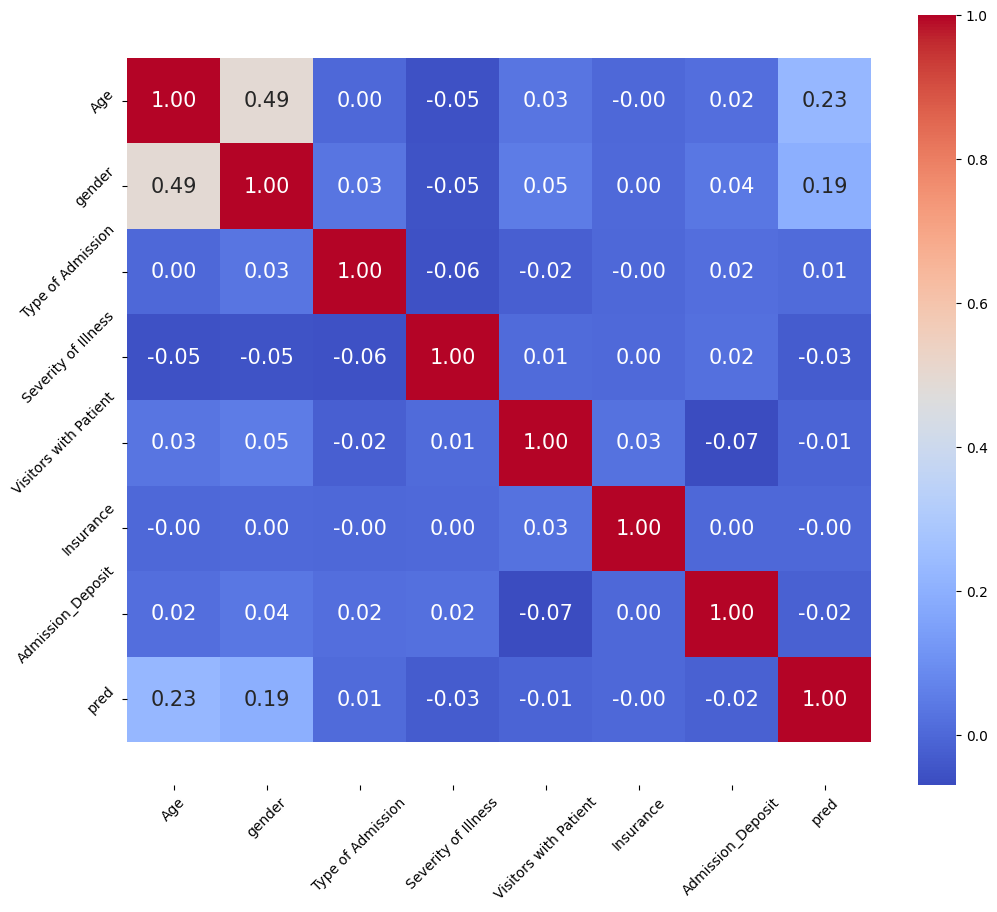

In [371]:
corr = hospitalizaciones[columnas[1]].corr()
plot_corre_heatmap(corr)

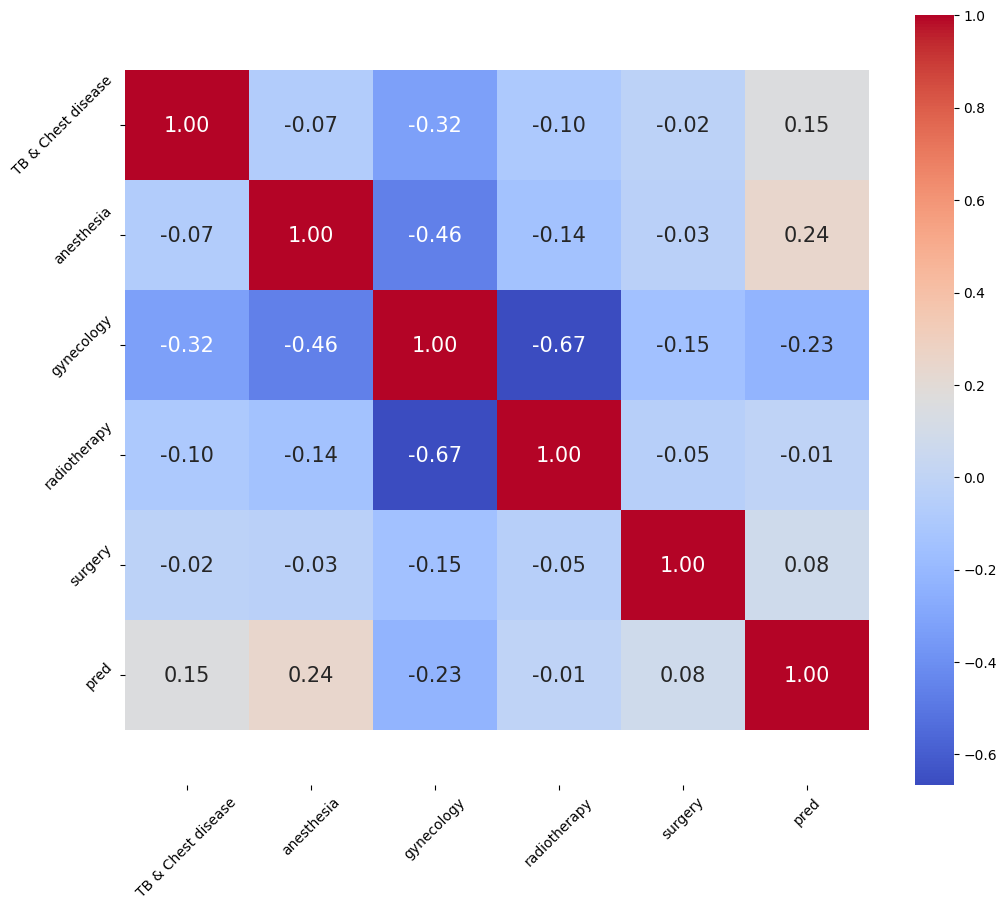

In [372]:
corr = hospitalizaciones[columnas[2]].corr()
plot_corre_heatmap(corr)

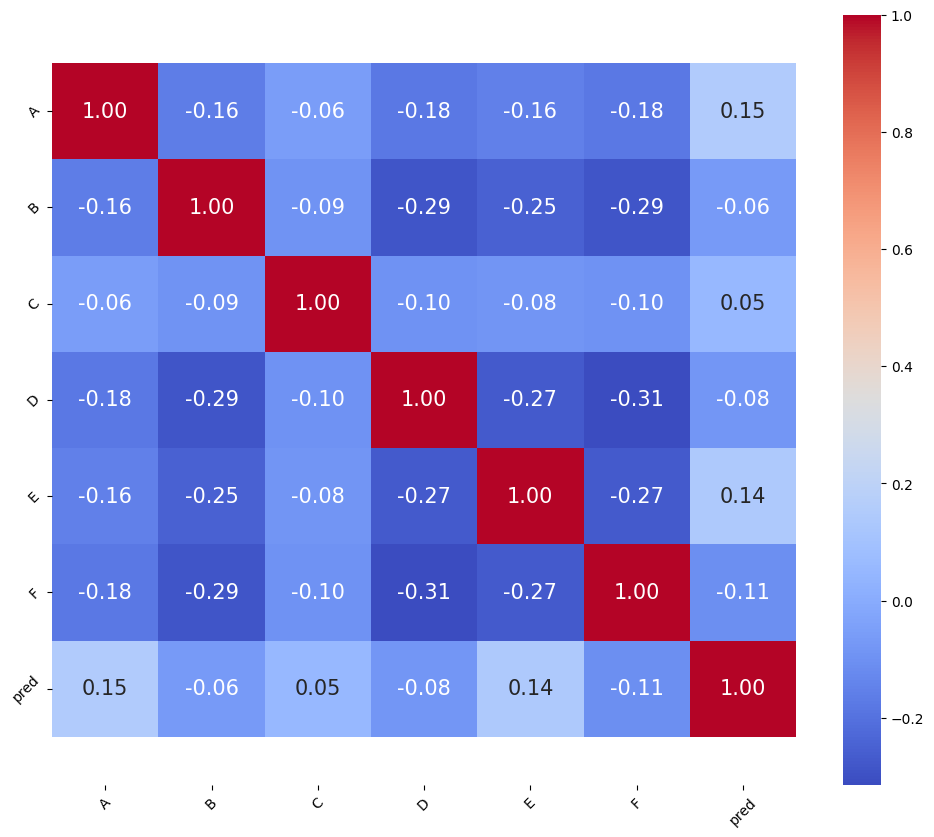

In [373]:
corr = hospitalizaciones[columnas[3]].corr()
plot_corre_heatmap(corr)

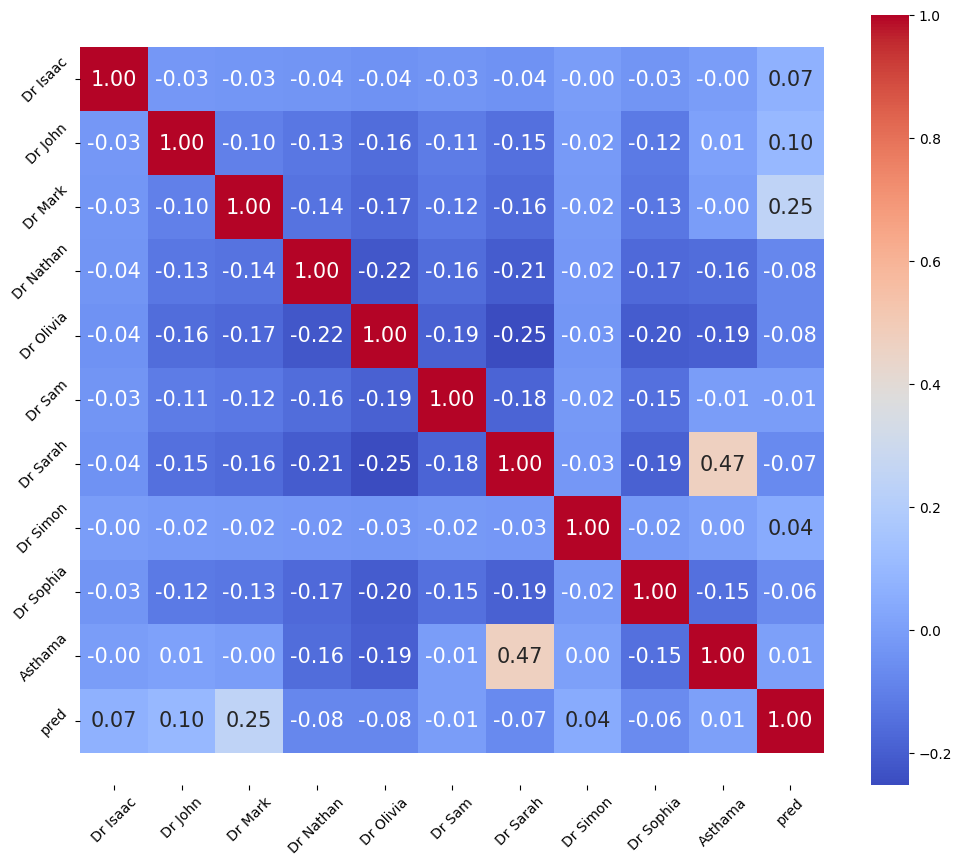

In [374]:
corr = hospitalizaciones[columnas[4]].corr()
plot_corre_heatmap(corr)

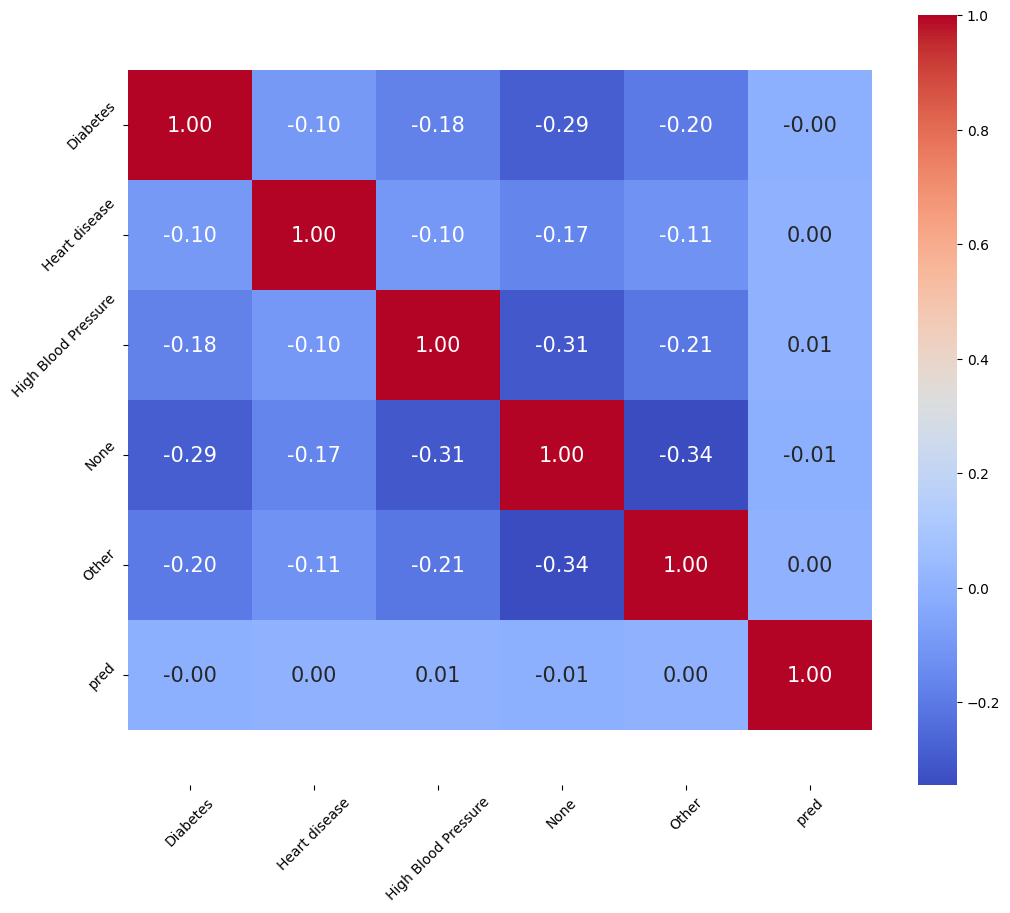

In [375]:
corr = hospitalizaciones[columnas[5]].corr()
plot_corre_heatmap(corr)

-----------------------

In [376]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2, RFE, RFECV, f_regression, mutual_info_regression, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
import warnings

In [377]:
warnings.filterwarnings('ignore')

In [378]:
def generate_accuracy_and_heatmap(model, x, y):
    ac = accuracy_score(y, model.predict(x))
    f_score = f1_score(y, model.predict(x))
    re = recall_score(y, model.predict(x))
    print('Accuracy is:     ', ac)
    print('F1 score is:     ', f_score)
    print('Recall is:     ', re)
    print("\n")
    print(pd.crosstab(pd.Series(model.predict(x), name="Predicted"),
                      pd.Series(y['pred'], name='Actual')))
    return 1

In [379]:
numerical_feature_columns = list(hospitalizaciones._get_numeric_data().columns)

In [502]:
target = 'pred'

<AxesSubplot: >

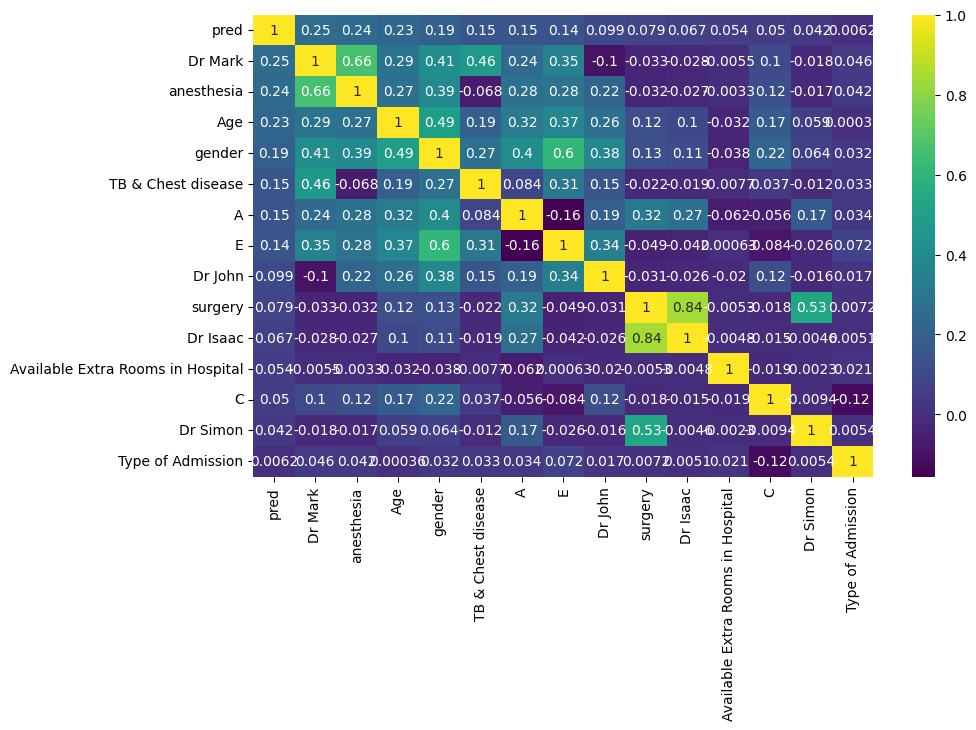

In [381]:
k = 15
cols = hospitalizaciones[numerical_feature_columns].corr().nlargest(k, target)[target].index
cm = hospitalizaciones[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap='viridis')

In [503]:
X = hospitalizaciones.loc[:, hospitalizaciones.columns != target]
Y = hospitalizaciones.loc[:, hospitalizaciones.columns == target]

In [504]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [384]:
clf_lr = LogisticRegression()
lr_baseline_model = clf_lr.fit(x_train, y_train)

In [385]:
generate_accuracy_and_heatmap(lr_baseline_model, x_test, y_test)

Accuracy is:      0.59339985218034
F1 score is:      0.6965921562787823
Recall is:      0.752212494788875


Actual         0      1
Predicted              
0           4734   7798
1          12243  20039


1

Univariable Feature Selection

In [386]:
select_feature = SelectKBest(f_classif, k=5).fit(x_train, y_train)

In [387]:
selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)                                     

,Feature,Scores
22,Dr Mark,17730.255860
10,anesthesia,17085.672557
11,gynecology,15140.332896
2,Age,14789.034895
3,gender,10585.333429
9,TB & Chest disease,6723.947127
14,A,6355.126871
18,E,5238.803461
19,F,3130.787840
21,Dr John,2679.726265


In [388]:
x_train_chi = select_feature.transform(x_train)
x_test_chi = select_feature.transform(x_test)

In [389]:
lr_chi_model = clf_lr.fit(x_train_chi, y_train)

In [390]:
generate_accuracy_and_heatmap(lr_chi_model, x_test_chi, y_test)

Accuracy is:      0.60490022172949
F1 score is:      0.7413450232976732
Recall is:      0.9124888333035555


Actual         0      1
Predicted              
0           1567   2572
1          15410  25265


1

Recursive Feature Selection

In [391]:
rfe = RFE(estimator=clf_lr, step=1)
rfe = rfe.fit(x_train, y_train)

In [392]:
selected_rfe_features = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')                                      

,Feature,Ranking
17,D,1
16,C,1
15,B,1
14,A,1
13,surgery,1
12,radiotherapy,1
11,gynecology,1
10,anesthesia,1
19,F,1
9,TB & Chest disease,1


In [393]:
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

In [394]:
x_train_rfe[0:3]

array([[6., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0.],
       [5., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0.],
       [3., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0.]])

In [395]:
lr_rfe_model = clf_lr.fit(x_train_rfe, y_train)
generate_accuracy_and_heatmap(lr_rfe_model, x_test_rfe, y_test)

Accuracy is:      0.5868883961566889
F1 score is:      0.7263264067059676
Recall is:      0.8834613781192305


Actual         0      1
Predicted              
0           1890   3070
1          15087  24767


1

Recursive Feature Elimination with Cross Validation

In [106]:
# 3' 12''
rfecv = RFECV(estimator=clf_lr, step=1, cv=5, scoring='recall')
rfecv = rfecv.fit(x_train, y_train)
print("Optimal numbers of Features: ", rfecv.n_features_)
print("Best Features: ", x_train.columns[rfecv.support_])

Optimal numbers of Features:  1
Best Features:  Index(['anesthesia'], dtype='object')


In [109]:
x_train_rfecv = rfecv.transform(x_train)
x_test_rfecv = rfecv.transform(x_test)

In [110]:
lr_rfecv_model = clf_lr.fit(x_train_rfecv, y_train)

In [111]:
generate_accuracy_and_heatmap(lr_rfecv_model, x_test_rfecv, y_test)

Accuracy is:      0.620509977827051
F1 score is:      0.7658206198262296
Recall is:      1.0


Actual         0      1
Predicted              
1          16977  27837


1

-------

In [396]:
from sklearn.tree import DecisionTreeClassifier

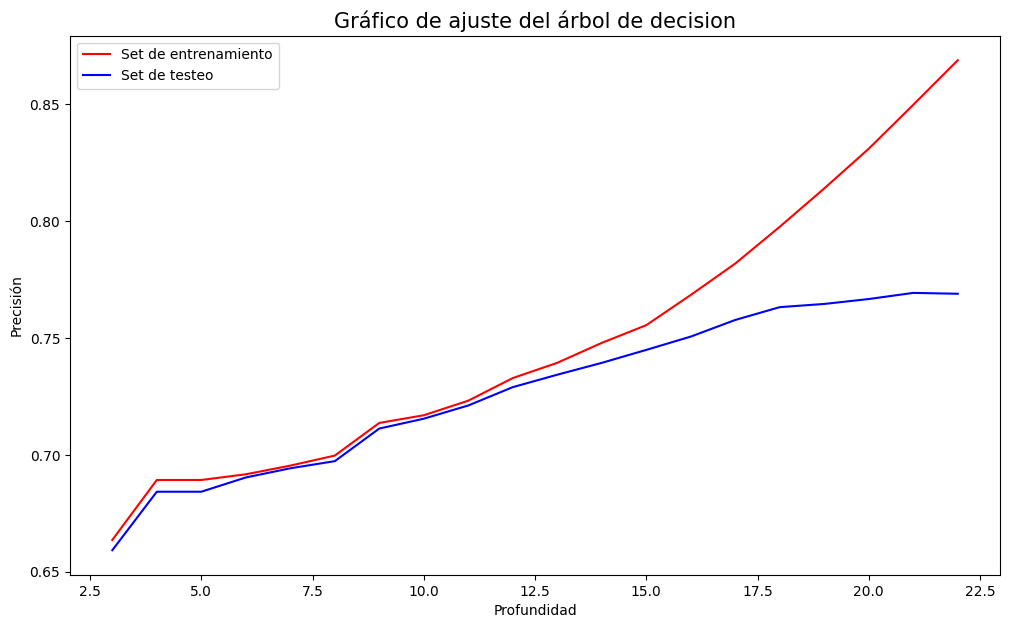

In [397]:
train_prec =  []
test_prec = []
max_deep_list = list(range(3, 23))

for deep in max_deep_list:
    clf_3 = DecisionTreeClassifier(max_depth=deep, criterion='entropy')
    clf_3.fit(x_train, y_train)
    train_prec.append(clf_3.score(x_train, y_train))
    test_prec.append(clf_3.score(x_test, y_test))

plt.figure(figsize=(12,7))
plt.plot(max_deep_list, train_prec, color='r', label='Set de entrenamiento')
plt.plot(max_deep_list, test_prec, color='b', label='Set de testeo')
plt.title('Gráfico de ajuste del árbol de decision', fontsize = 15)
plt.legend()
plt.ylabel('Precisión')
plt.xlabel('Profundidad')
plt.show()

In [626]:
clf_3 = DecisionTreeClassifier(max_depth = 22, random_state = 0, criterion='entropy') 
clf_3.fit(x_train, y_train)
ac = accuracy_score(y_test, clf_3.predict(x_test))
f_score = f1_score(y_test, clf_3.predict(x_test))
re = recall_score(y_test, clf_3.predict(x_test))
print('Accuracy is:     ', ac)
print('F1 score is:     ', f_score)
print('Recall is:     ', re)

Accuracy is:      0.7685957132298595
F1 score is:      0.8135203549837695
Recall is:      0.8134476803049252


Aplicar GridSearch

In [399]:
# Elijo los criterios de separacion (Gini o Entropia) y elijo tmb la Profundidad del arbol (2 a 8)
tree_para = {'criterion':['gini','entropy'],'max_depth':[6,8,9,10,12,14,15,16,22]}
scoring = ['accuracy','recall']

# Va a probar 14 combinaciones de este arbol de decision multiplicado por 5 (cv). En total 70 entrenamientos diferentes
# El scoring puede ser: accuracy, precision o recall
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5, scoring = scoring, refit="accuracy") 

In [299]:
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 9, 10, 12, 14, 15, 16, 22]},
             refit='accuracy', scoring=['accuracy', 'recall'])

In [300]:
# Comparamos con las etiquetas reales
ac = accuracy_score(y_test, clf.predict(x_test))
f_score = f1_score(y_test, clf.predict(x_test))
re = recall_score(y_test, clf.predict(x_test))
print('Accuracy is:     ', ac)
print('F1 score is:     ', f_score)
print('Recall is:     ', re)
print('Best Param: ', clf.best_params_)

Accuracy is:      0.768669623059867
F1 score is:      0.8136775745164688
Recall is:      0.814031326305759
Best Param:  {'criterion': 'entropy', 'max_depth': 22}


--------------------

In [404]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [405]:
k_range = list(range(20, 31))
param_grid = dict(n_neighbors=k_range, weights=['uniform', 'distance'], algorithm=['auto', 'ball_tree', 'kd_tree', 'brute'])

In [327]:
# 108' 32''
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='recall', return_train_score=False, verbose=1)
grid.fit(x_train, y_train)
# {'algorithm': 'auto', 'n_neighbors': 30, 'weights': 'distance'}

Fitting 10 folds for each of 88 candidates, totalling 880 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                                         30],
                         'weights': ['uniform', 'distance']},
             scoring='recall', verbose=1)

In [332]:
print(grid.best_params_)
print(grid.feature_names_in_)

{'algorithm': 'auto', 'n_neighbors': 30, 'weights': 'distance'}
['Available Extra Rooms in Hospital' 'Department' 'Ward_Facility_Code'
 'doctor_name' 'staff_available' 'Age' 'gender' 'Type of Admission'
 'Severity of Illness' 'health_conditions' 'Visitors with Patient'
 'Insurance' 'Admission_Deposit' 'TB & Chest disease' 'anesthesia'
 'gynecology' 'radiotherapy' 'surgery' 'A' 'B' 'C' 'D' 'E' 'F' 'Dr Isaac'
 'Dr John' 'Dr Mark' 'Dr Nathan' 'Dr Olivia' 'Dr Sam' 'Dr Sarah'
 'Dr Simon' 'Dr Sophia' 'Asthama' 'Diabetes' 'Heart disease'
 'High Blood Pressure' 'None' 'Other']


In [407]:
# Optimo
grid = KNeighborsClassifier(n_neighbors=30, weights='distance', algorithm='auto')
grid.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=30, weights='distance')

In [409]:
# Comparamos con las etiquetas reales
ac = accuracy_score(y_test, grid.predict(x_test))
f_score = f1_score(y_test, grid.predict(x_test))
re = recall_score(y_test, grid.predict(x_test))
print('Accuracy is:     ', ac)
print('F1 score is:     ', f_score)
print('Recall is:     ', re)

Accuracy is:      0.6711086474501109
F1 score is:      0.7505787264095422
Recall is:      0.7975105711393008


--------------------

In [147]:
from sklearn.svm import SVC
clf = SVC(kernel='poly', random_state=0)

In [148]:
# 63' 44''
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)    

x_train_chi = select_feature.transform(x_train)
x_test_chi = select_feature.transform(x_test)

lr_chi_model = clf.fit(x_train_chi, y_train)

generate_accuracy_and_heatmap(lr_chi_model, x_test_chi, y_test)

Accuracy is:      0.620509977827051
F1 score is:      0.7658206198262296
Recall is:      1.0


Actual         0      1
Predicted              
1          16977  27837


1

--------------

In [150]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="log", penalty="l2")
scaler = StandardScaler()
scaler.fit(x_train)
x_train_sgd = scaler.transform(x_train)
x_test_sgd = scaler.transform(x_test)
clf.fit(x_train_sgd, y_train)
y_pred = clf.predict(x_test_sgd)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))

Accuracy: 0.61
Recall: 0.84


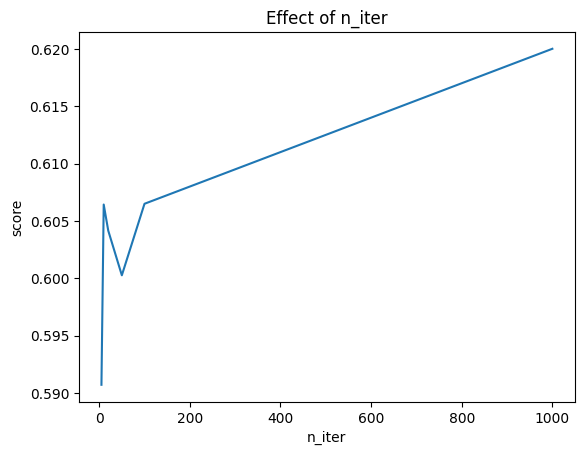

In [151]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []
for n_iter in n_iters:
    clf = SGDClassifier(loss="log", penalty="l2", max_iter=n_iter)
    clf.fit(x_train_sgd, y_train)
    scores.append(clf.score(x_test_sgd, y_test))
  
plt.title("Effect of n_iter")
plt.xlabel("n_iter")
plt.ylabel("score")
plt.plot(n_iters, scores)   

In [153]:
from sklearn.model_selection import GridSearchCV
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "elasticnet", "none"],
}

clf = SGDClassifier(max_iter=1000)
grid = GridSearchCV(clf, param_grid=params, cv=10)

In [154]:
# 98' 55''
grid.fit(x_train_sgd, y_train)

print(grid.best_params_) 
# {'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l2'}

{'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l2'}


In [155]:
grid_predictions = grid.predict(x_test_sgd)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, grid_predictions)))

Accuracy: 0.62
Recall: 1.00


In [157]:
generate_accuracy_and_heatmap(grid, x_test_sgd, y_test)

Accuracy is:      0.620509977827051
F1 score is:      0.7658206198262296
Recall is:      1.0


Actual         0      1
Predicted              
1          16977  27837


1

--------------------

In [604]:
from sklearn.preprocessing import StandardScaler

In [605]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [606]:
import tensorflow.compat.v1 as tf

In [637]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [638]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

In [639]:
# epochs = 20
history = model.fit(x_train_scaled, y_train.to_numpy(), epochs=20)

Train on 274700 samples
Epoch 1/20
274700/274700 [==============================] - 11s 40us/sample - loss: 0.4715 - recall: 0.8868 - accuracy: 0.7003
Epoch 2/20
274700/274700 [==============================] - 11s 40us/sample - loss: 0.4590 - recall: 0.8758 - accuracy: 0.7139
Epoch 3/20
274700/274700 [==============================] - 11s 40us/sample - loss: 0.4551 - recall: 0.8691 - accuracy: 0.7199
Epoch 4/20
274700/274700 [==============================] - 11s 40us/sample - loss: 0.4519 - recall: 0.8689 - accuracy: 0.7238
Epoch 5/20
274700/274700 [==============================] - 11s 40us/sample - loss: 0.4491 - recall: 0.8633 - accuracy: 0.7287
Epoch 6/20
274700/274700 [==============================] - 11s 40us/sample - loss: 0.4460 - recall: 0.8567 - accuracy: 0.7325
Epoch 7/20
274700/274700 [==============================] - 11s 40us/sample - loss: 0.4433 - recall: 0.8500 - accuracy: 0.7356
Epoch 8/20
274700/274700 [==============================] - 11s 40us/sample - loss: 0.4

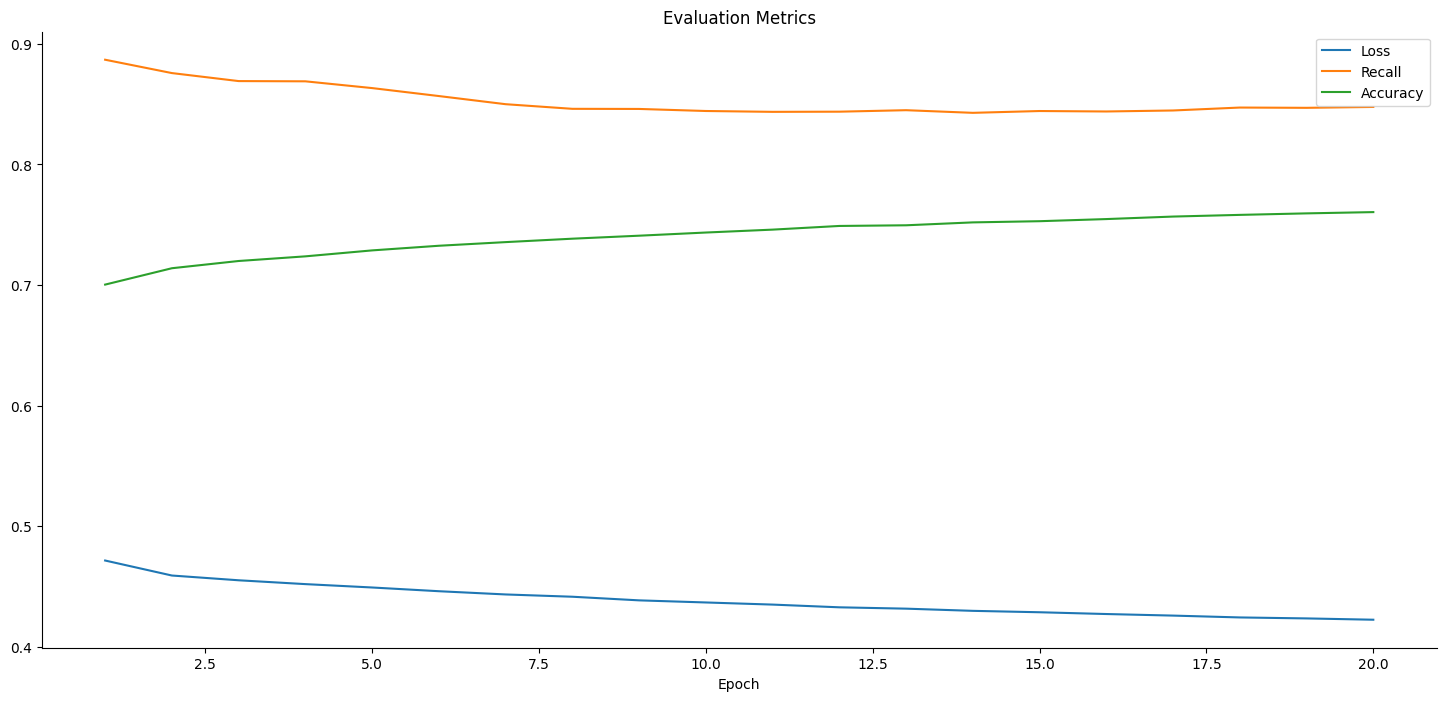

In [640]:
plt.plot(np.arange(1,21), history.history['loss'], label="Loss")
plt.plot(np.arange(1,21), history.history['recall'], label="Recall")
plt.plot(np.arange(1,21), history.history['accuracy'], label="Accuracy")
plt.title("Evaluation Metrics")
plt.xlabel("Epoch")
plt.legend()

In [641]:
loss, rec, acc = model.evaluate(x_test_scaled, y_test)

In [642]:
# Mejor 0.86 y 0.74
print(f"Model Loss (Test): {loss}")
print(f"Model Recall (Test): {rec}")
print(f"Model Accuracy (Test): {acc}")

Model Loss (Test): 0.43784372900647756
Model Recall (Test): 0.8635221123695374
Model Accuracy (Test): 0.7458019256591797


In [650]:
np.set_printoptions(suppress=True)

In [652]:
predict = [1 if prob > 0.5 else 0 for prob in np.ravel(model.predict(x_test_scaled))]

In [656]:
print(f"Recall : {recall_score(y_test, predict)}")
print(f"Accuracy : {accuracy_score(y_test, predict)}")

Recall : 0.8635221249478887
Accuracy : 0.7458019216555802
